## Q1. Explain the basic concept of clustering and give examples of applications where clustering is useful.


Clustering is a machine learning technique that involves grouping similar data points together based on their characteristics or patterns. The goal of clustering is to find natural groupings or clusters in the data without any prior knowledge of the class labels.

- Customer segmentation: Clustering customers based on their purchasing behavior or demographic information to identify distinct groups for targeted marketing strategies.
- Image segmentation: Grouping pixels or regions in an image based on their color, texture, or spatial proximity for tasks like object recognition or image compression.
- Document clustering: Organizing documents based on their content similarity to facilitate document retrieval or topic modeling.

***

## Q2. What is DBSCAN and how does it differ from other clustering algorithms such as k-means and hierarchical clustering?


- DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm.
 - Handling clusters of arbitrary shapes: DBSCAN can discover clusters of different shapes and sizes, whereas k-means assumes clusters with spherical shapes and hierarchical clustering assumes nested hierarchical structures.
 - Handling noise and outliers: DBSCAN can effectively identify and classify noise points as outliers, while k-means and hierarchical clustering assign all data points to clusters, including outliers.
 - Automatic determination of cluster number: DBSCAN does not require specifying the number of clusters in advance, whereas k-means and hierarchical clustering often need the number of clusters as an input.

***

## Q3. How do you determine the optimal values for the epsilon and minimum points parameters in DBSCAN clustering?


- Visual inspection: Plotting the distance to the kth nearest neighbor against the data points can help identify the elbow point where a significant increase in distance occurs. This can provide a suitable value for epsilon.
- Reachability plot: Plotting the reachability distance against the data points can help identify a suitable threshold for minimum points.
- Silhouette score: Calculating the silhouette score for different combinations of epsilon and minimum points can help select the parameter values that yield the highest silhouette score, indicating better cluster quality.

***

## Q4. How does DBSCAN clustering handle outliers in a dataset?


DBSCAN clustering handles outliers in a dataset by classifying them as noise points. Outliers are considered as data points that do not belong to any dense region and are not part of any cluster. DBSCAN identifies dense regions and connects data points within these regions, leaving the outliers as unassigned points or noise.

***

## Q5. How does DBSCAN clustering differ from k-means clustering?


- Number of clusters: DBSCAN does not require specifying the number of clusters in advance, while k-means clustering requires predefining the number of clusters.
- Cluster shape and size: DBSCAN can discover clusters of arbitrary shapes and sizes, while k-means assumes clusters with spherical shapes and similar sizes.
- Handling outliers: DBSCAN can effectively identify and classify outliers as noise points, while k-means assigns all data points to clusters, including outliers.

***

## Q6. Can DBSCAN clustering be applied to datasets with high dimensional feature spaces? If so, what are some potential challenges?


DBSCAN clustering can be applied to datasets with high-dimensional feature spaces, but it may face challenges such as the curse of dimensionality. As the number of dimensions increases, the density becomes more uniform, and the concept of neighborhood density becomes less meaningful. 

***

## Q7. How does DBSCAN clustering handle clusters with varying densities?


DBSCAN clustering handles clusters with varying densities by grouping together data points that are closely packed and have sufficient density. The algorithm automatically adjusts to the density of different clusters and can identify clusters of varying sizes and densities. In DBSCAN, dense regions are connected, and data points that fall within the defined density threshold are assigned to the same cluster.

***

## Q8. What are some common evaluation metrics used to assess the quality of DBSCAN clustering results?


- Silhouette coefficient: Measures the compactness and separation of clusters, with values ranging from -1 to 1. Higher values indicate better-defined clusters.
- Davies-Bouldin index: Quantifies the average similarity between clusters, with lower values indicating better-defined clusters.
- Adjusted Rand Index (ARI): Compares the clustering results to ground truth labels, with values ranging from -1 to 1. Higher values indicate better agreement between the clustering and true labels.

***

## Q9. Can DBSCAN clustering be used for semi-supervised learning tasks?


 The labeled data can help in assigning cluster labels to the unlabeled data points based on their proximity or similarity to the labeled instances.

***

## Q10. How does DBSCAN clustering handle datasets with noise or missing values?


- It treats noise points as outliers and does not assign them to any cluster.
- For missing values, various techniques can be applied, such as imputing the missing values with appropriate methods before performing DBSCAN or using a modified version of DBSCAN that accounts for missing values during density computations.

***

## Q11. Implement the DBSCAN algorithm using a python programming language, and apply it to a sample dataset. Discuss the clustering results and interpret the meaning of the obtained clusters.

In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import make_moons

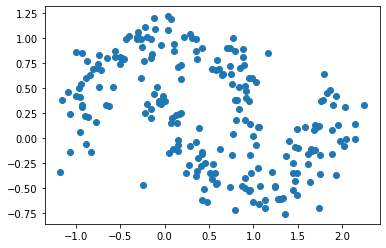

In [263]:
x, y = make_moons(n_samples=220,noise=0.15)
plt.scatter(x[:, 0], x[:, 1])

In [264]:
## Standardaise

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

In [265]:
## Model build
from sklearn.cluster import DBSCAN
db = DBSCAN(eps = 0.28)
db.fit(x_scale)

DBSCAN(eps=0.28)

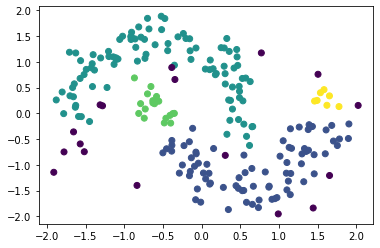

In [266]:
plt.scatter(x_scale[:, 0], x_scale[:, 1], c = db.labels_)


In [267]:
labels = db.labels_
core_samples = db.core_sample_indices_

# Print the clustering results
print("Cluster labels:", labels)
print("Core samples:", core_samples)

Cluster labels: [ 0  0  0  1  1  1  0  2  0 -1  1  0  1  0  0  0  1  0  0  0  1  2  3  0
  1  1  0  1  0  0  2  1  2  0 -1  1  0  0  1  1  0  0  1  2  2  1  0  1
  1  1  1 -1  0  1  0  1  0  1  1  1  0  2  1  0  0  1  0  1  1  0  3  0
  2  0  1  1  1  1  1  1  0  1  1  1  0  0  1 -1  0  0  2  1  1  1  0  1
  1  1  1  1  1  0  3 -1  1  0  0  2  1  0  0  1  1 -1 -1  2  1  0  1  1
  1  1  0  1  1  0  1  1  0  1  0  1  0  1  1 -1  2  1  0  1 -1  0 -1  0
  1  0 -1 -1  1  0  0  1 -1  1  3  1  0  2  2  1  0  1  1  0  1  1  2  0
  0  1 -1  1  1  0 -1  0 -1  1  1  1  1  1  0  1  0  0  1  0  0  0  0  1
  0  0  1  0  1  1  0  1  0  0  3  0  1  3  1 -1  2  2  1  0  0  0  2  1
  3  1  0  1]
Core samples: [  0   1   2   3   4   5   6   7   8  10  11  12  14  15  16  17  18  19
  21  22  24  25  27  29  30  31  32  33  36  37  38  41  42  44  45  46
  48  52  53  54  55  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  77  78  79  81  82  84  85  86  88  89  90  91  92
  93  9